## Credit Card Defaulters
This is a classification problem.        
In this we have to predict whether an individual will be defaulter or not

In [1]:
# Importing basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Reading the dataset
df=pd.read_csv(r'C:\Users\star pc\Desktop\UCI_Credit_Card.csv')

#### Dataset description
There are 25 variables:

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment (1=yes, 0=no)

In [3]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [5]:
# dataset description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
# there are no categorical columns

In [7]:
# Checking for null/missing values
df.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [8]:
# there are no missing values in the dataset

### EDA- Exploratory Data Analysis

#### Categorical Columns
Sex, Marriage and Education are categorical columns

2    18112
1    11888
Name: SEX, dtype: int64


<AxesSubplot:>

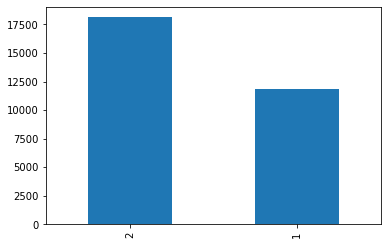

In [9]:
# distribution of sex column
print(df['SEX'].value_counts())
df['SEX'].value_counts().plot(kind = 'bar')

In [10]:
df['default.payment.next.month'].groupby(df['SEX']).value_counts()

SEX  default.payment.next.month
1    0                              9015
     1                              2873
2    0                             14349
     1                              3763
Name: default.payment.next.month, dtype: int64

In [11]:
# the sex column is pretty balanced

2    15964
1    13659
3      323
0       54
Name: MARRIAGE, dtype: int64


<AxesSubplot:>

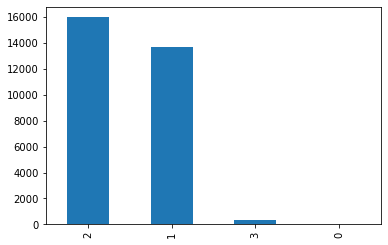

In [12]:
# distribution of Marriage column
print(df['MARRIAGE'].value_counts())
df['MARRIAGE'].value_counts().plot(kind = 'bar')

2    14030
1    10585
3     4917
5      280
4      123
6       51
0       14
Name: EDUCATION, dtype: int64


<AxesSubplot:>

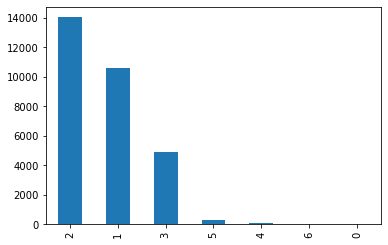

In [13]:
print(df['EDUCATION'].value_counts())
df['EDUCATION'].value_counts().plot(kind='bar')

In [14]:
df['PAY_0'].value_counts()

 0    14737
-1     5686
 1     3688
-2     2759
 2     2667
 3      322
 4       76
 5       26
 8       19
 6       11
 7        9
Name: PAY_0, dtype: int64

### Numerical columns

In [15]:
def draw_histograms(df, variables, n_rows, n_cols, n_bins):
    fig=plt.figure()
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        df[var_name].hist(bins=n_bins,ax=ax)
        ax.set_title(var_name)
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

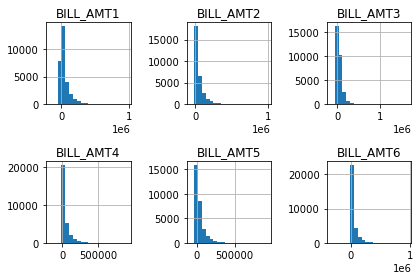

In [16]:
bills = df[['BILL_AMT1','BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]
draw_histograms(bills, bills.columns, 2, 3, 20)

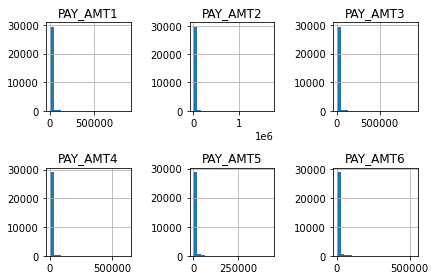

In [17]:
pay = df[['PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
draw_histograms(pay, pay.columns, 2, 3, 20)

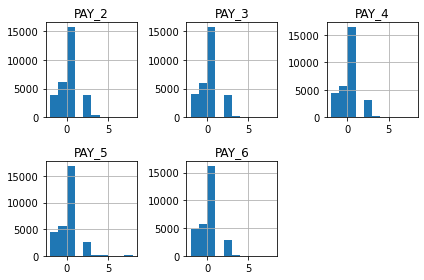

In [18]:
late = df[['PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']]
draw_histograms(late, late.columns, 2, 3, 10)

<AxesSubplot:>

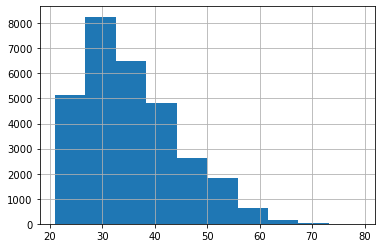

In [19]:
df['AGE'].hist()

<AxesSubplot:>

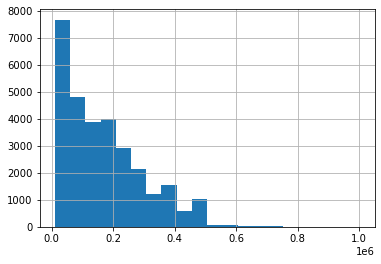

In [20]:
df['LIMIT_BAL'].hist(bins = 20)

### Correlation

<AxesSubplot:>

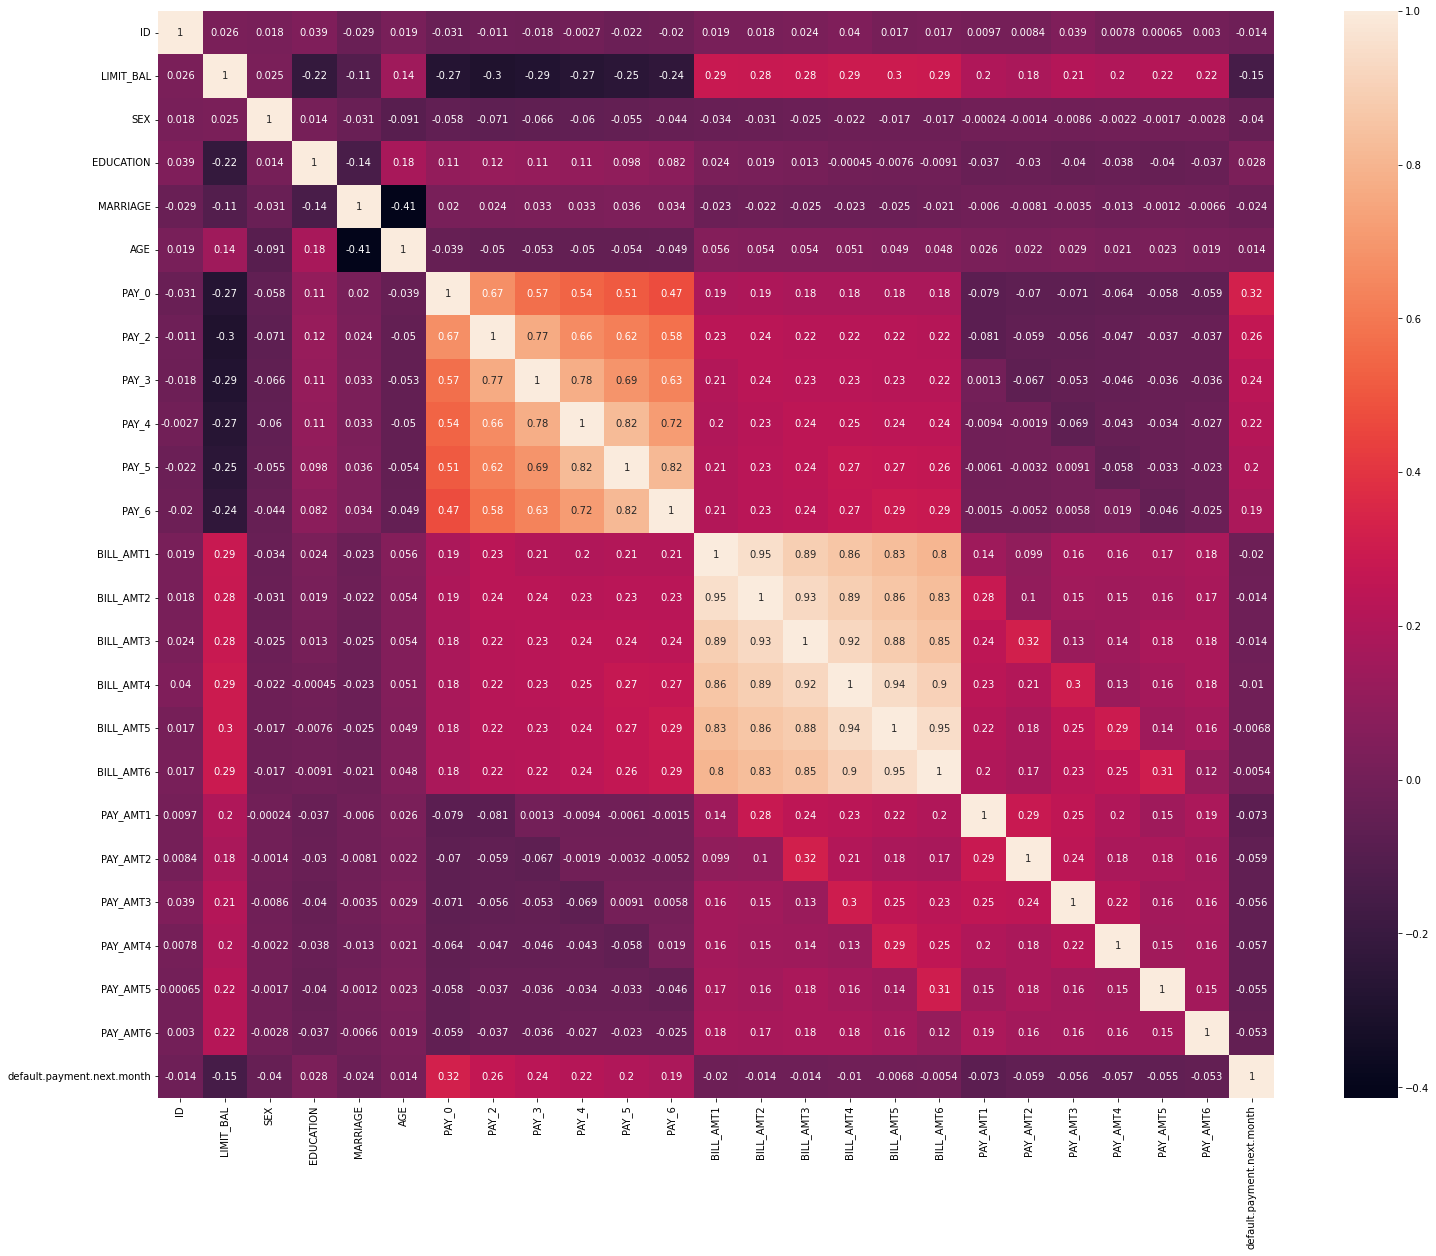

In [21]:
corr=df.corr()
plt.figure(figsize=(25,20))
sns.heatmap(corr,annot=True)

It's an interesting correlation plot. The heatmat shows that features are correlated with each other (collinearity), such us like PAY_0,2,3,4,5,6 and BILL_AMT1,2,3,4,5,6. In those cases, the correlation is positive

### Data Cleaning

There are many undocumented labels in the dataset. So it's time to clean them up

The 0 (undocumented), 5 and 6 (label unknown) in EDUCATION can be put in a 'Other' category (thus 4)

In [22]:
new = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[new, 'EDUCATION'] = 4

In [23]:
df.EDUCATION.value_counts()

2    14030
1    10585
3     4917
4      468
Name: EDUCATION, dtype: int64

The 0 in MARRIAGE can be categorized as 'Other' and assign label 3

In [24]:
df.loc[df.MARRIAGE == 0, 'MARRIAGE'] = 3
df.MARRIAGE.value_counts()

2    15964
1    13659
3      377
Name: MARRIAGE, dtype: int64

"-1" is paid duly, but there are "-2" and "0" labels in payment status variable. So let's combine them and put everything as "0"

In [25]:
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1) | (df.PAY_0 == 0)
df.loc[fil, 'PAY_0'] = 0
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1) | (df.PAY_2 == 0)
df.loc[fil, 'PAY_2'] = 0
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1) | (df.PAY_3 == 0)
df.loc[fil, 'PAY_3'] = 0
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1) | (df.PAY_4 == 0)
df.loc[fil, 'PAY_4'] = 0
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1) | (df.PAY_5 == 0)
df.loc[fil, 'PAY_5'] = 0
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1) | (df.PAY_6 == 0)
df.loc[fil, 'PAY_6'] = 0

In [26]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


### Baseline Model

A baseline model that uses heuristics, simple summary statistics, randomness, or machine learning to create predictions for a dataset. You can use these predictions to measure the baseline's performance (e.g., accuracy)-- this metric will then become what you compare any other machine learning algorithm against. So let's build a logistic regression without any hyperparameter tuning or feature engineering

#### Separating dependent and independent variables

In [27]:
X=df.drop('default.payment.next.month',axis=1)
y=df['default.payment.next.month']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

#### Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression(random_state=42) # initialising the object of Logistic regression
LR

LogisticRegression(random_state=42)

In [29]:
LR.fit(X_train,y_train)

C:\Users\star pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [30]:
y_pred=LR.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score,classification_report

In [32]:
accuracy=accuracy_score(y_pred,y_test)

In [33]:
print(accuracy)

0.784


In [34]:
# the model gave an accuracy of 78.4%


In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4703
           1       1.00      0.00      0.00      1297

    accuracy                           0.78      6000
   macro avg       0.89      0.50      0.44      6000
weighted avg       0.83      0.78      0.69      6000



### Feature Engineering

Perfrom OneHotEncoding on all the categorical features. Although the features have numerical values, we'll first convert them into object datatype and then perform OneHotEncoding.

In [36]:
df[['SEX','MARRIAGE','EDUCATION']] = df[['SEX','MARRIAGE','EDUCATION']].astype('object')

#One Hot encoding
df = pd.get_dummies(df,drop_first=True)
df.head()

C:\Users\star pc\anaconda3\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,0.0,0.0,0.0,1,1,1,0,0,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,1,1,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,1,1,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,1,1,0,0,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,9000.0,689.0,679.0,0,0,1,0,0,0,0


Now we have the final dataset . 

In [37]:
df.head()

,ID,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,...,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,SEX_2,EDUCATION_2,EDUCATION_3,EDUCATION_4,MARRIAGE_2,MARRIAGE_3
0,1,20000.0,24,2,2,0,0,0,0,3913.0,...,0.0,0.0,0.0,1,1,1,0,0,0,0
1,2,120000.0,26,0,2,0,0,0,2,2682.0,...,1000.0,0.0,2000.0,1,1,1,0,0,1,0
2,3,90000.0,34,0,0,0,0,0,0,29239.0,...,1000.0,1000.0,5000.0,0,1,1,0,0,1,0
3,4,50000.0,37,0,0,0,0,0,0,46990.0,...,1100.0,1069.0,1000.0,0,1,1,0,0,0,0
4,5,50000.0,57,0,0,0,0,0,0,8617.0,...,9000.0,689.0,679.0,0,0,1,0,0,0,0


Again separating the dependent and independent vaiable and splitting the dataset into train and test set

In [38]:
X=df.drop('default.payment.next.month',axis=1)
y=df['default.payment.next.month']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

### Model Building

Now training the model on different ML algorithms

In [40]:
# 1. Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred=LR.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\star pc\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\star pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\star pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.

In [41]:
accuracy=accuracy_score(y_pred,y_test)
print(accuracy)

0.7811666666666667


In [42]:
# 2. SVM
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred_svc=svc.predict(X_test)

In [43]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy                           0.78      6000
   macro avg       0.39      0.50      0.44      6000
weighted avg       0.61      0.78      0.69      6000



C:\Users\star pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\star pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\star pc\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
print("accuracy ",accuracy_score(y_pred_svc,y_test))

accuracy  0.7811666666666667


In [45]:
from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier()
RF

RandomForestClassifier()

In [46]:
RF.fit(X_train,y_train)

RandomForestClassifier()

In [47]:
y_pred_rf=RF.predict(X_test)

In [48]:
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5269
           1       0.36      0.64      0.46       731

    accuracy                           0.81      6000
   macro avg       0.65      0.74      0.67      6000
weighted avg       0.87      0.81      0.84      6000



In [49]:
accuracy=accuracy_score(y_pred_rf,y_test)

In [50]:
print(accuracy)

0.815


Hyper parameter tuning
    from sklearn.model_selection import GridSearchCV
    parameters={'n_estimators':[100,120,150,200],'criterion':['gini','entropy','log_loss'],
               'max_depth':[2,3,4],'max_features':['sqrt','log2','None']}
    rf_clf=GridSearchCV(parameters,RF,scoring="f1",cv=5)
    rf_clf.fit(X_train,y_train)

#### Decision Tree

In [51]:
from sklearn.tree import DecisionTreeClassifier
DT=DecisionTreeClassifier()
DT


DecisionTreeClassifier()

In [52]:
DT.fit(X_train,y_train)

DecisionTreeClassifier()

In [53]:
y_pred_dt=DT.predict(X_test)

In [54]:
print(classification_report(y_pred_dt,y_test))

              precision    recall  f1-score   support

           0       0.82      0.83      0.83      4610
           1       0.42      0.39      0.40      1390

    accuracy                           0.73      6000
   macro avg       0.62      0.61      0.62      6000
weighted avg       0.73      0.73      0.73      6000



In [55]:
accuracy=accuracy_score(y_pred_dt,y_test)
accuracy

0.7318333333333333

#### AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
adaboost=AdaBoostClassifier()
adaboost.fit(X_train,y_train)

AdaBoostClassifier()

In [57]:
y_pred_ada=adaboost.predict(X_test)

In [58]:
print(classification_report(y_pred_ada,y_test))

              precision    recall  f1-score   support

           0       0.96      0.83      0.89      5398
           1       0.31      0.67      0.42       602

    accuracy                           0.82      6000
   macro avg       0.63      0.75      0.66      6000
weighted avg       0.89      0.82      0.84      6000



In [59]:
accuracy=accuracy_score(y_test,y_pred_ada)


In [60]:
accuracy

0.8155

#### Gradient Boosting Classifier

In [61]:
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier()
gb_clf.fit(X_train,y_train)

GradientBoostingClassifier()

In [62]:
y_pred_gb=gb_clf.predict(X_test)

In [63]:
print(classification_report(y_test,y_pred_gb))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4687
           1       0.66      0.36      0.46      1313

    accuracy                           0.82      6000
   macro avg       0.75      0.65      0.68      6000
weighted avg       0.80      0.82      0.80      6000



In [64]:
accuracy=accuracy_score(y_pred_gb,y_test)
print(accuracy)

0.8198333333333333


In [65]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)

[16:37:51] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\star pc\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
C:\Users\star pc\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\star pc\anaconda3\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [66]:
y_pred_xgb=xgb.predict(X_test)

In [67]:
print(classification_report(y_pred_xgb,y_test))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      5272
           1       0.35      0.64      0.46       728

    accuracy                           0.82      6000
   macro avg       0.65      0.74      0.67      6000
weighted avg       0.87      0.82      0.84      6000



In [68]:
accuracy=accuracy_score(y_pred_xgb,y_test)
accuracy

0.8151666666666667

#### Conclusion: AdaBoost performed the best with an accuracy of 81.98